In [0]:
import pandas as pd
import numpy as np
from sklearn.pipeline import Pipeline

from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, FunctionTransformer, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score, roc_auc_score, roc_curve
from lightgbm import LGBMClassifier
from pathlib import Path

In [0]:
views = spark.sql(f"""
SELECT
    view._token_associate_id AS user_id,
    view._id AS item_id,
    view.click AS rating
FROM
    onedata_us_east_1_shared_dit.nas_raw_lyric_search_dit.ml_search_with_click AS view
JOIN
    (
        SELECT
            traceId,
            MAX(resPos) AS max_resPos
        FROM
            onedata_us_east_1_shared_dit.nas_raw_lyric_search_dit.ml_search_with_click
        WHERE
            click_object_id IS NOT NULL
        GROUP BY
            traceId
    ) AS click
ON
    view.traceId = click.traceId
    AND view.resPos <= click.max_resPos * 3
WHERE view.action = "actions"
 """)

In [0]:
item_df = spark.sql(f"""
SELECT
    click_object_id AS item_id,
    click_details_caption AS title
FROM
    onedata_us_east_1_shared_dit.nas_raw_lyric_search_dit.ml_search_with_click
WHERE
    click_object_id IS NOT NULL AND action = "actions"
GROUP BY
    click_object_id,
    click_details_caption
""")

In [0]:
view_merge_item = views.join(item_df, on="item_id", how="inner")
df = view_merge_item
# df = view_merge_item.toPandas()
display(df)

item_id,user_id,rating,title
468b47ae9bec4c23875c66a7f165bb06,6167e2ad-dcd5-42e7-8620-e5bf7b013c49,1,Clock In/Out
1c8362ee6cf44ff49990d29f3f783825,520568db-2d4e-4b07-ba04-fc2a87444e55,0,Manage Your Company's Compensation
5de9ac14b5964f9486f8c8040ae42fd7,520568db-2d4e-4b07-ba04-fc2a87444e55,0,Configure Compensation Reviews
ef8181cdd35b4662b8dcc2fec2146d69,520568db-2d4e-4b07-ba04-fc2a87444e55,1,Manage Compensation Reviews
ac88a5027bca47408d31fbba4a5146a5,c1e5e4b0-5515-4b95-bdda-2dd12b7f7f6a,1,Configure Work Relationship Types
f0b0e94638cd4ffb8ee446fbca6c9086,3344cc32-097a-4ade-b022-7aa6f9773002,1,AOID Tracker
ff3b3f8391b7490c95f3c0c693327aa5,7864e425-bbea-4537-9425-f807f60bf131,1,Reports & Analytics
dad8ca38c787479783ff3933af512ddb,11251081-1dbf-4f5b-b347-b4d61ff4ac0e,1,Performance Evaluation
dcfb1c00f6414037935ad05e2c69d10c,36be4cc7-cc35-4efb-88a3-75fa55600f85,0,View My Time Off
9ca43b27a0ed48d699f0e126a9dcbe14,36be4cc7-cc35-4efb-88a3-75fa55600f85,1,View Time Dashboard


In [0]:
from pyspark.sql.functions import col

df = df.withColumn('rating', col('rating') == 1)

In [0]:
df.printSchema()

root
 |-- item_id: string (nullable = true)
 |-- user_id: string (nullable = true)
 |-- rating: boolean (nullable = true)
 |-- title: string (nullable = true)



In [0]:
df.groupby('rating').count().show()

+------+-----+
|rating|count|
+------+-----+
|  true|  909|
| false|  994|
+------+-----+



In [0]:
df_train, df_val = df.randomSplit([0.8, 0.2], seed=12345)

In [0]:
# import databricks.automl

# summary = databricks.automl.classify(df_train, target_col='rating', primary_metric="roc_auc", timeout_minutes=120)

In [0]:
import databricks.automl

summary = databricks.automl.classify(df_train, target_col='rating', primary_metric="roc_auc", timeout_minutes=120)

(2025-07-08 01:40:39) WARNING: Hyperopt is deprecated for Databricks runtime for machine learning and will not be pre-installed in the next major version.


---------------------------------------------------------------------------
TypeError                                 Traceback (most recent call last)
File <command-7342070529831717>, line 3
      1 import databricks.automl
----> 3 summary = databricks.automl.classify(df_train, target_col='rating', primary_metric="roc_auc", model_family="lightgbm", timeout_minutes=120)

TypeError: classify() got an unexpected keyword argument 'model_family'

In [0]:
def transformation(df: pd.DataFrame):
    """
    Args:
        df: DataFrame to be transformed
    Returns:
        cat_transform: categorical transformation pipeline
        num_transform: numerical transformation pipeline
    """
    # Identify categorical columns
    c_cols = df.select_dtypes(include=['object', 'category']).columns
    print(c_cols)

    # Categorical transformation pipeline
    c_pipeline = Pipeline(steps=[
        ("imputer", SimpleImputer(strategy='most_frequent')),
        ("one_hot_encoder", OneHotEncoder(handle_unknown="ignore")),
    ])
    cat_transform = [("onehot", c_pipeline, c_cols)]
    print(cat_transform)

    # Identify numerical columns
    n_cols = df.select_dtypes(include=[np.number]).columns.difference(['rating'])
    n_pipeline = Pipeline(steps=[
        ("converter", FunctionTransformer(lambda df: df.apply(pd.to_numeric, errors="coerce"))),
        ("imputer", SimpleImputer(strategy='mean')),
        ("standardizer", StandardScaler()),
    ])
    num_transform = [("numerical", n_pipeline, n_cols)]
    print(num_transform)
    return cat_transform, num_transform


In [0]:
from sklearn.metrics import precision_score, recall_score, accuracy_score, mean_squared_error, mean_absolute_error, r2_score


def compute_evaluation_metrics(y_true, y_pred):
    """
    Args:
        y_true: true labels
        y_pred: predicted labels
    Returns:
        precision: precision score
        recall: recall score
        accuracy: accuracy score
    """
    p = precision_score(y_true, y_pred)
    r = recall_score(y_true, y_pred)
    acc = accuracy_score(y_true, y_pred)
    return p, r, acc

In [0]:
model_name = "lyric-ml-recommender"
owner = "nas-lifion_ml-sdq"
project = "recommender-system"
category = "Tree-Based Model"
function = "Recommendation"
adp_cost_gen_ai = "No"
genai_cdo_use_case_id = "None"
model_description = "Recommender System Ranking Model"

# Construct the dictionary
model_tags = {
    "Owner": owner,
    "Project": project,
    "Category": category,
    "Function": function,
    "ADP Cost Gen AI": adp_cost_gen_ai,
    "GenAI CDO Use Case ID": genai_cdo_use_case_id,
    "mlflow.note.content": model_description,
}
print(model_tags)

{'Owner': 'nas-lifion_ml-sdq', 'Project': 'recommender-system', 'Category': 'Tree-Based Model', 'Function': 'Recommendation', 'ADP Cost Gen AI': 'No', 'GenAI CDO Use Case ID': 'None', 'mlflow.note.content': 'Recommender System Ranking Model'}


In [0]:
import mlflow


user = sqlContext.sql("SELECT current_user()").collect()[0]["current_user()"]
experiment_name = f"/Users/{user}/ml-recommender:TreeBased"

In [0]:
experiment_name

'/Users/ling.huang@adp.com/ml-recommender:TreeBased'

In [0]:
experiment_id = None
try:
    experiment_id = mlflow.create_experiment(name=experiment_name)
except Exception as e:
    if e.error_code == "RESOURCE_ALREADY_EXISTS":
        experiment = mlflow.get_experiment_by_name(experiment_name)
        # don't trust the assumption that the error code is correct
        if not experiment:
            raise ValueError("Experiment not found")
        experiment_id = experiment.experiment_id
        # print instead of raise, so notebook execution isn't interrupted
        print(e)
    else:
        raise e

print(f"Experiment ID: {experiment_id}")

RESOURCE_ALREADY_EXISTS: Node named 'ml-recommender:TreeBased' already exists
Experiment ID: 1260173104439974


In [0]:
import mlflow
from mlflow.exceptions import RestException
from mlflow.models.signature import infer_signature

# https://confluence.es.ad.adp.com/spaces/cdomlops/pages/3197965047/Permissions+needed+Tags
# https://confluence.es.ad.adp.com/spaces/cdomlops/pages/3197965049/Code-based+approach
# https://ci.singleglobaldataplatform.us.caas.oneadp.com/job/sgdp_platform/job/databricks_unity_catalog/job/databricks_uc_model_registration/job/devops/job/nonprod/job/register_model/7/console


experiment_id = "3953900158975728"

# experiment_id = None
# try:
#     experiment_id = mlflow.create_experiment(experiment_location)
# except RestException as e:
#     if e.error_code == "RESOURCE_ALREADY_EXISTS":
#         experiment = mlflow.get_experiment_by_name(experiment_location)
#         experiment_id = experiment.experiment_id
#     else:
#         raise e
    
registry_scope = f"ml-recommender:TreeBased"
registry_uri = f"databricks://{registry_scope}"
mlflow.set_registry_uri(registry_uri)

def model(data, cat_transform, num_transform):
    """
    Args:
        train: training data
        test: test data
    Returns:
        model: trained model
    """
    mlflow.lightgbm.autolog()
    with mlflow.start_run(nested=True, experiment_id=experiment_id, tags=model_tags):
        run_id = mlflow.active_run().info.run_id
        print(f"Run_id: {run_id}")

        target_col = "rating"
        split_X = data.drop([target_col], axis=1)
        split_y = data[target_col] >= 1
        train_x, test_x, train_y, test_y = train_test_split(split_X, split_y, train_size=0.9, random_state=149849802, stratify=split_y)

        # Define the model pipeline
        preprocessor = ColumnTransformer(num_transform + cat_transform, remainder="passthrough", sparse_threshold=1)

        # Prepare the pipeline
        pipeline = Pipeline([
            ("preprocessor", preprocessor),
            ("model", LGBMClassifier(
            ))
        ])
        pipeline.fit(train_x, train_y)

        # Fit the model
        print('-' * 80)
        pred1 = pipeline.predict(train_x)
        precision, recall, acc = compute_evaluation_metrics(train_y, pred1)
        print('train: Precision {:.4f} | Recall {:.4f} | accuracy {:.4f}'.format(precision, recall, acc))
        print('F1-score in training data:', f1_score(train_y, pred1))
        prob1 = pipeline.predict_proba(train_x)[:, 1]
        auc_score = roc_auc_score(train_y, prob1)
        print('AUC in training data:', auc_score)
        print('-' * 80)
        mlflow.log_metric('auc-training', auc_score)

        pred2 = pipeline.predict(test_x)
        precision, recall, acc = compute_evaluation_metrics(test_y, pred2)
        print('test: Precision {:.4f} | Recall {:.4f} | accuracy {:.4f}'.format(precision, recall, acc))
        print('F1-score in test data:', f1_score(test_y, pred2))
        prob2 = pipeline.predict_proba(test_x)[:, 1]
        auc_score = roc_auc_score(test_y, prob2)
        print('AUC in test data:', auc_score)
        mlflow.log_metric('auc-test', auc_score)

        signature = infer_signature(train_x, pipeline.predict(train_x))
        input_example = train_x.head(1)
        mlflow.sklearn.log_model(pipeline, "model", signature=signature, input_example=input_example)


In [0]:
pdf = df.toPandas()

In [0]:
c_trans, n_trans = transformation(pdf)

---------------------------------------------------------------------------
NameError                                 Traceback (most recent call last)
File <command-7985304191996351>, line 2
      1 pdf = df.toPandas()
----> 2 c_trans, n_trans = transformation(pdf)

NameError: name 'transformation' is not defined

In [0]:
### https://confluence.es.ad.adp.com/spaces/cdomlops/pages/3197965047/Permissions+needed+Tags

### https://bitbucket.es.ad.adp.com/projects/ONEAIOPS/repos/end_to_end_automated_pipeline/browse/src/model_training/model_training.py

### https://bitbucket.es.ad.adp.com/projects/DSBASE/repos/jobclassification/browse/notebooks/mlflow_models/FastText_for_Job_Titles.py#111


In [0]:
model(pdf, c_trans, n_trans)

Run_id: 09a1e369c02a4f2b9815c66f6364d6fb
[LightGBM] [Info] Number of positive: 818, number of negative: 894
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.003251 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 126
[LightGBM] [Info] Number of data points in the train set: 1712, number of used features: 63
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.477804 -> initscore=-0.088843
[LightGBM] [Info] Start training from score -0.088843
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] 

Uploading artifacts:   0%|          | 0/9 [00:00<?, ?it/s]

--------------------------------------------------------------------------------
train: Precision 0.8692 | Recall 0.5526 | accuracy 0.7465
F1-score in training data: 0.6756352765321375
AUC in training data: 0.8426086980303354
--------------------------------------------------------------------------------
test: Precision 0.8621 | Recall 0.5495 | accuracy 0.7435
F1-score in test data: 0.6711409395973155
AUC in test data: 0.7771428571428572


Uploading artifacts:   0%|          | 0/11 [00:00<?, ?it/s]

### Hyperparameter tuning

In [0]:
display(pdf)

item_id,user_id,rating,title
468b47ae9bec4c23875c66a7f165bb06,6167e2ad-dcd5-42e7-8620-e5bf7b013c49,true,Clock In/Out
1c8362ee6cf44ff49990d29f3f783825,520568db-2d4e-4b07-ba04-fc2a87444e55,false,Manage Your Company's Compensation
5de9ac14b5964f9486f8c8040ae42fd7,520568db-2d4e-4b07-ba04-fc2a87444e55,false,Configure Compensation Reviews
ef8181cdd35b4662b8dcc2fec2146d69,520568db-2d4e-4b07-ba04-fc2a87444e55,true,Manage Compensation Reviews
ac88a5027bca47408d31fbba4a5146a5,c1e5e4b0-5515-4b95-bdda-2dd12b7f7f6a,true,Configure Work Relationship Types
f0b0e94638cd4ffb8ee446fbca6c9086,3344cc32-097a-4ade-b022-7aa6f9773002,true,AOID Tracker
ff3b3f8391b7490c95f3c0c693327aa5,7864e425-bbea-4537-9425-f807f60bf131,true,Reports & Analytics
dad8ca38c787479783ff3933af512ddb,11251081-1dbf-4f5b-b347-b4d61ff4ac0e,true,Performance Evaluation
dcfb1c00f6414037935ad05e2c69d10c,36be4cc7-cc35-4efb-88a3-75fa55600f85,false,View My Time Off
9ca43b27a0ed48d699f0e126a9dcbe14,36be4cc7-cc35-4efb-88a3-75fa55600f85,true,View Time Dashboard


In [0]:
target_col = "rating"

In [0]:
# Assuming pdf is a Pandas DataFrame
df_train_test = pdf.sample(frac=0.9, random_state=12345)
df_val = pdf.drop(df_train_test.index)
df_train = df_train_test.sample(frac=0.8, random_state=12345)
df_test = df_train_test.drop(df_train.index)

In [0]:
# Separate target column from features and drop _automl_split_col_0000
X_train = df_train.drop([target_col], axis=1)
y_train = df_train[target_col]

X_val = df_val.drop([target_col], axis=1)
y_val = df_val[target_col]

X_test = df_test.drop([target_col], axis=1)
y_test = df_test[target_col]

In [0]:
from databricks.automl_runtime.sklearn.column_selector import ColumnSelector
supported_cols = ["item_id", "title", "user_id"]
col_selector = ColumnSelector(supported_cols)

In [0]:
params = {
  "colsample_bytree": 0.514110006702232,
  "lambda_l1": 0.2519477297842174,
  "lambda_l2": 97.75994735799596,
  "learning_rate": 0.7238180156124475,
  "max_bin": 411,
  "max_depth": 5,
  "min_child_samples": 106,
  "n_estimators": 563,
  "num_leaves": 459,
  "path_smooth": 86.24468589325652,
  "subsample": 0.7230826178445122,
  "random_state": 750994329,
}

In [0]:
for c in supported_cols:
    X_train[c] = X_train[c].astype('category')
    X_val[c] = X_val[c].astype('category')
    X_test[c] = X_test[c].astype('category')

In [0]:
from databricks.automl_runtime.sklearn import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline

one_hot_imputers = []

one_hot_pipeline = Pipeline(steps=[
    ("imputers", ColumnTransformer(one_hot_imputers, remainder="passthrough")),
    ("one_hot_encoder", OneHotEncoder(handle_unknown="indicator")),
])

categorical_one_hot_transformers = [("onehot", one_hot_pipeline, ["item_id", "title", "user_id"])]

In [0]:
from sklearn.compose import ColumnTransformer

transformers = categorical_one_hot_transformers

preprocessor = ColumnTransformer(transformers, remainder="passthrough", sparse_threshold=1)

In [0]:
### https://community.databricks.com/t5/machine-learning/save-model-from-automl-to-mlflow-in-lightgbm-flavor/td-p/102701

In [0]:
### https://docs.databricks.com/aws/en/machine-learning/train-model/scikit-learn#basic-example

# https://community.databricks.com/t5/machine-learning/save-model-from-automl-to-mlflow-in-lightgbm-flavor/td-p/102701

In [0]:
from mlflow.pyfunc import PyFuncModel

with mlflow.start_run(experiment_id=experiment_id) as mlflow_run:
    # Train a lightGBM model
    lgb_classifier = lgb.LGBMClassifier(**params)
    # model.fit(X=X_train, y=y_train)
    model = Pipeline([
    ("column_selector", col_selector),
    ("preprocessor", preprocessor),
    ("classifier", lgb_classifier),
    ])
    mlflow.lightgbm.autolog()
    model.fit(X_train, y_train)

    # # Log metrics for the training set
    # lgbmc_training_metrics = mlflow.evaluate(
    #     model=model,
    #     data=X_train,
    #     targets=y_train,
    #     model_type="classifier",
    #     evaluators="default"
    # )

    # # Log metrics for the test set
    # lgbmc_test_metrics = mlflow.evaluate(
    #     model=model,
    #     data=X_test,
    #     targets=y_test,
    #     model_type="classifier",
    #     evaluators="default"
    # )

    # # Log metrics for the validation set
    # lgbmc_val_metrics = mlflow.evaluate(
    #     model=model,
    #     data=X_val,
    #     targets=y_val,
    #     model_type="classifier",
    #     evaluators="default"
    # )

    # # Display the logged metrics
    # lgbmc_val_metrics = {k.replace("validation_", ""): v for k, v in lgbmc_val_metrics.items()}
    # lgbmc_test_metrics = {k.replace("test_", ""): v for k, v in lgbmc_test_metrics.items()}
    # print(lgbmc_test_metrics)

---------------------------------------------------------------------------
TypeError                                 Traceback (most recent call last)
File <command-7342070529831293>, line 13
      7 model = Pipeline([
      8 ("column_selector", col_selector),
      9 ("preprocessor", preprocessor),
     10 ("classifier", lgb_classifier),
     11 ])
     12 mlflow.lightgbm.autolog()
---> 13 model.fit(X_train, y_train.astype(float))

File /databricks/python/lib/python3.12/site-packages/mlflow/utils/autologging_utils/safety.py:483, in safe_patch.<locals>.safe_patch_function(*args, **kwargs)
    479 call_original = update_wrapper_extended(call_original, original)
    481 event_logger.log_patch_function_start(args, kwargs)
--> 483 patch_function(call_original, *args, **kwargs)
    485 session.state = "succeeded"
    486 event_logger.log_patch_function_success(args, kwargs)

File /databricks/python/lib/python3.12/site-packages/mlflow/utils/autologging_utils/safety.py:182, in with_managed_

In [0]:
from databricks.automl_runtime.sklearn import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline

one_hot_imputers = []

one_hot_pipeline = Pipeline(steps=[
    ("imputers", ColumnTransformer(one_hot_imputers, remainder="passthrough")),
    ("one_hot_encoder", OneHotEncoder(handle_unknown="indicator")),
])

categorical_one_hot_transformers = [("onehot", one_hot_pipeline, ["item_id", "title", "user_id"])]

In [0]:
from sklearn.compose import ColumnTransformer

transformers = categorical_one_hot_transformers

preprocessor = ColumnTransformer(transformers, remainder="passthrough", sparse_threshold=1)

In [0]:
user = sqlContext.sql("SELECT current_user()").collect()[0]["current_user()"]
experiment_name = f"/Users/{user}/ml-recommender:TreeBased"
print(f"experiment_name: {experiment_name}")

experiment_id = None
try:
    experiment_id = mlflow.create_experiment(name=experiment_name)
except Exception as e:
    if e.error_code == "RESOURCE_ALREADY_EXISTS":
        experiment = mlflow.get_experiment_by_name(experiment_name)
        # don't trust the assumption that the error code is correct
        if not experiment:
            raise ValueError("Experiment not found")
        experiment_id = experiment.experiment_id
        # print instead of raise, so notebook execution isn't interrupted
        print(e)
    else:
        raise e
print(f"Experiment ID: {experiment_id}")

experiment_name: /Users/ling.huang@adp.com/ml-recommender:TreeBased
Experiment ID: 4413996043156620


In [0]:
params = {
  "colsample_bytree": 0.514110006702232,
  "lambda_l1": 0.2519477297842174,
  "lambda_l2": 97.75994735799596,
  "learning_rate": 0.7238180156124475,
  "max_bin": 411,
  "max_depth": 5,
  "min_child_samples": 106,
  "n_estimators": 563,
  "num_leaves": 459,
  "path_smooth": 86.24468589325652,
  "subsample": 0.7230826178445122,
  "random_state": 750994329,
}

In [0]:
import mlflow
import lightgbm as lgb
import mlflow.lightgbm
from mlflow.models.signature import infer_signature

from mlflow.models import Model, infer_signature, ModelSignature
from mlflow.pyfunc import PyFuncModel
from mlflow import pyfunc
import sklearn
from sklearn import set_config
from sklearn.pipeline import Pipeline

from hyperopt import hp, tpe, fmin, STATUS_OK, Trials

# Create a separate pipeline to transform the validation dataset. This is used for early stopping.
mlflow.sklearn.autolog(disable=True)
pipeline_val = Pipeline([
    ("column_selector", col_selector),
    ("preprocessor", preprocessor),
])
pipeline_val.fit(X_train, y_train)
X_val_processed = pipeline_val.transform(X_val)

def objective(params):
    with mlflow.start_run(experiment_id=experiment_id) as mlflow_run:
        lgbmc_classifier = LGBMClassifier(**params)

        model = Pipeline([
            ("column_selector", col_selector),
            ("preprocessor", preprocessor),
            ("classifier", lgbmc_classifier),
        ])

        # Enable automatic logging of input samples, metrics, parameters, and models
        mlflow.sklearn.autolog(
            log_input_examples=True,
            silent=True)
        model.fit(X_train, y_train, classifier__callbacks=[lgb.early_stopping(5), lgb.log_evaluation(0)], classifier__eval_set=[(X_val_processed,y_val)])

        # Log metrics for the training set
        lgbmc_training_metrics = mlflow.sklearn.eval_and_log_metrics(model, X_train, y_train, prefix="training_")

        # Log metrics for the validation set
        lgbmc_val_metrics = mlflow.sklearn.eval_and_log_metrics(model, X_val, y_val, prefix="val_")

        # Log metrics for the test set
        lgbmc_test_metrics = mlflow.sklearn.eval_and_log_metrics(model, X_test, y_test, prefix="test_")

        loss = lgbmc_val_metrics["val_f1_score"]

        # Truncate metric key names so they can be displayed together
        lgbmc_val_metrics = {k.replace("val_", ""): v for k, v in lgbmc_val_metrics.items()}
        lgbmc_test_metrics = {k.replace("test_", ""): v for k, v in lgbmc_test_metrics.items()}

    return {
      "loss": loss,
      "status": STATUS_OK,
      "val_metrics": lgbmc_val_metrics,
      "test_metrics": lgbmc_test_metrics,
      "model": model,
      "run": mlflow_run,
    }

In [0]:
space = {
  "colsample_bytree": 0.5655989267963984,
  "lambda_l1": 31.125979447297205,
  "lambda_l2": 33.88612024657531,
  "learning_rate": 0.292445826919433,
  "max_bin": 428,
  "max_depth": 9,
  "min_child_samples": 182,
  "n_estimators": 724,
  "num_leaves": 811,
  "path_smooth": 90.97050554368093,
  "subsample": 0.7143732017757635,
  "random_state": 855876001,
}

In [0]:
import lightgbm as lgb
from hyperopt import fmin, tpe, Trials
import pandas as pd
from sklearn import set_config

trials = Trials()
fmin(objective,
     space=space,
     algo=tpe.suggest,
     max_evals=1,  # Increase this when widening the hyperparameter search space.
     trials=trials)

if trials.trials:
    best_result = trials.best_trial["result"]
    model = best_result["model"]
    mlflow_run = best_result["run"]

    display(
      pd.DataFrame(
        [float(best_result["val_metrics"]), float(best_result["test_metrics"])] ,
        index=["validation", "test"]).astype(np.float64))

    set_config(display="diagram")
    model
else:
    print("No trials found.")

  0%|          | 0/1 [00:00<?, ?trial/s, best loss=?]

(2025-07-07 17:48:36) ERROR: job exception: Expected np.float32 or np.float64, met type(int64)


  0%|          | 0/1 [00:00<?, ?trial/s, best loss=?]


---------------------------------------------------------------------------
TypeError                                 Traceback (most recent call last)
File <command-7342070529827691>, line 7
      4 from sklearn import set_config
      6 trials = Trials()
----> 7 fmin(objective,
      8      space=space,
      9      algo=tpe.suggest,
     10      max_evals=1,  # Increase this when widening the hyperparameter search space.
     11      trials=trials)
     13 if trials.trials:
     14     best_result = trials.best_trial["result"]

File /databricks/.python_edge_libs/hyperopt/fmin.py:561, in fmin(fn, space, algo, max_evals, timeout, loss_threshold, trials, rstate, allow_trials_fmin, pass_expr_memo_ctrl, catch_eval_exceptions, verbose, return_argmin, points_to_evaluate, max_queue_len, show_progressbar, early_stop_fn, trials_save_file)
    558     fn = __objective_fmin_wrapper(fn)
    560 if allow_trials_fmin and hasattr(trials, "fmin"):
--> 561     return trials.fmin(
    562         fn,


In [0]:
import json


context_str = dbutils.notebook.entry_point.getDbutils().notebook().getContext().toJson()
context = json.loads(context_str)
print(context)

{'rootRunId': None, 'currentRunId': None, 'jobGroup': '1751834270720_6167772516556717638_61f1f62ad3c24f7daa6e093c12951a54', 'tags': {'eventWindowTime': '1.3072762600000001E7', 'replId': '1751834270720', 'user': 'ling.huang@adp.com', 'opId': 'Driver-b0d6fcc67c270f94', 'shardName': 'nvirginia-prod', 'opTarget': 'executeCommandInRepl', 'notebookEditorNodeType': 'shell', 'clusterMemory': '15360', 'computeId': '1115-210312-r1ijapqo', 'serverBackendName': 'com.databricks.backend.daemon.driver.DriverCorral', 'notebookId': '3953900158975728', 'executedCommandLanguage': 'python', 'projectName': 'driver', 'tabStartTimestampMillis': '1751815766635', 'tier': 'tier-multitenant', 'sqlWarehouseAssetTypeOverride': 'notebook', 'httpTarget': '/notebook/3953900158975728/command/7985304192000386', 'commandRunId': '8faede27-15d3-4a48-9c7f-a4a8b2eafabb', 'buildHash': '', 'testUser': 'ling.huang@adp.com', 'workspaceRoutingTarget': 'null', 'browserHash': '#command/7342070529827574', 'browserPathName': '/edito

In [0]:
job_id = context.get('tags', {}).get('jobId', None)
job_run_id = context.get('tags', {}).get('jobRunId', None)
run_as = context.get('tags', {}).get('user', None)
print(f"Job ID: {job_id},jobRunId: {job_run_id}")

Job ID: None,jobRunId: None


In [0]:
best_run = mlflow.search_runs(experiment_ids=[experiment_id], order_by=['metrics.auc DESC']).iloc[0]
mlflow_run_id = best_run.run_id
spark_conf = f"{spark.conf.get('spark.databricks.workspaceUrl')}"
print(spark_conf)

adpdc-share1-dev.cloud.databricks.com


In [0]:
import lightgbm
from lightgbm import LGBMClassifier

help(LGBMClassifier)

Help on class LGBMClassifier in module lightgbm.sklearn:

class LGBMClassifier(sklearn.base.ClassifierMixin, LGBMModel)
 |  LGBMClassifier(boosting_type: str = 'gbdt', num_leaves: int = 31, max_depth: int = -1, learning_rate: float = 0.1, n_estimators: int = 100, subsample_for_bin: int = 200000, objective: Union[str, Callable[[Optional[numpy.ndarray], numpy.ndarray], Tuple[numpy.ndarray, numpy.ndarray]], Callable[[Optional[numpy.ndarray], numpy.ndarray, Optional[numpy.ndarray]], Tuple[numpy.ndarray, numpy.ndarray]], Callable[[Optional[numpy.ndarray], numpy.ndarray, Optional[numpy.ndarray], Optional[numpy.ndarray]], Tuple[numpy.ndarray, numpy.ndarray]], NoneType] = None, class_weight: Union[Dict, str, NoneType] = None, min_split_gain: float = 0.0, min_child_weight: float = 0.001, min_child_samples: int = 20, subsample: float = 1.0, subsample_freq: int = 0, colsample_bytree: float = 1.0, reg_alpha: float = 0.0, reg_lambda: float = 0.0, random_state: Union[int, numpy.random.mtrand.RandomS

In [0]:
import mlflow
import sklearn
from sklearn import set_config
from sklearn.pipeline import Pipeline
import pandas as pd

from hyperopt import hp, tpe, fmin, STATUS_OK, Trials

# Create a separate pipeline to transform the validation dataset. This is used for early stopping.
mlflow.sklearn.autolog(disable=True)
pipeline_val = Pipeline([
    ("column_selector", col_selector),
    ("preprocessor", preprocessor),
])
pipeline_val.fit(X_train, y_train)
X_val_processed = pipeline_val.transform(X_val)

mlflow.xgboost.autolog()
def objective(params):
    with mlflow.start_run(nested=True):
        lgbmc_classifier = LGBMClassifier(**params)

        model = Pipeline([
            ("column_selector", col_selector),
            ("preprocessor", preprocessor),
            ("classifier", lgbmc_classifier),
        ])

        # Enable automatic logging of input samples, metrics, parameters, and models
        mlflow.sklearn.autolog(
            log_input_examples=True,
            silent=True)

        model.fit(X_train, y_train, classifier__callbacks=[lightgbm.early_stopping(5), lightgbm.log_evaluation(0)], classifier__eval_set=[(X_val_processed,y_val)])


        # Log metrics for the training set
        lgbmc_training_metrics = mlflow.sklearn.eval_and_log_metrics(model, X_train, y_train, prefix="training_", pos_label=1)

        # Log metrics for the validation set
        lgbmc_val_metrics = mlflow.sklearn.eval_and_log_metrics(model, X_val, y_val, prefix="val_", pos_label=1)

        # Log metrics for the test set
        lgbmc_test_metrics = mlflow.sklearn.eval_and_log_metrics(model, X_test, y_test, prefix="test_", pos_label=1)

        loss = lgbmc_val_metrics["val_f1_score"]

        # Truncate metric key names so they can be displayed together
        lgbmc_val_metrics = {k.replace("val_", ""): v for k, v in lgbmc_val_metrics.items()}
        lgbmc_test_metrics = {k.replace("test_", ""): v for k, v in lgbmc_test_metrics.items()}

    return {
      "loss": loss,
      "status": STATUS_OK,
      "val_metrics": lgbmc_val_metrics,
      "test_metrics": lgbmc_test_metrics,
      "model": model,
    }

In [0]:
import lightgbm
from lightgbm import LGBMClassifier

help(LGBMClassifier)

Help on class LGBMClassifier in module lightgbm.sklearn:

class LGBMClassifier(sklearn.base.ClassifierMixin, LGBMModel)
 |  LGBMClassifier(boosting_type: str = 'gbdt', num_leaves: int = 31, max_depth: int = -1, learning_rate: float = 0.1, n_estimators: int = 100, subsample_for_bin: int = 200000, objective: Union[str, Callable[[Optional[numpy.ndarray], numpy.ndarray], Tuple[numpy.ndarray, numpy.ndarray]], Callable[[Optional[numpy.ndarray], numpy.ndarray, Optional[numpy.ndarray]], Tuple[numpy.ndarray, numpy.ndarray]], Callable[[Optional[numpy.ndarray], numpy.ndarray, Optional[numpy.ndarray], Optional[numpy.ndarray]], Tuple[numpy.ndarray, numpy.ndarray]], NoneType] = None, class_weight: Union[Dict, str, NoneType] = None, min_split_gain: float = 0.0, min_child_weight: float = 0.001, min_child_samples: int = 20, subsample: float = 1.0, subsample_freq: int = 0, colsample_bytree: float = 1.0, reg_alpha: float = 0.0, reg_lambda: float = 0.0, random_state: Union[int, numpy.random.mtrand.RandomS

In [0]:
import matplotlib.pyplot as plt
import seaborn as sns

def plot_feature_distributions(X: pd.DataFrame, n_cols: int = 3) -> plt.Figure:
    """
    Creates a grid of histograms for each feature in the dataset.

    Args:
        X (pd.DataFrame): DataFrame containing synthetic features.
        n_cols (int): Number of columns in the grid layout.

    Returns:
        plt.Figure: The matplotlib Figure object containing the distribution plots.
    """
    features = X.columns
    n_features = len(features)
    n_rows = (n_features + n_cols - 1) // n_cols
    
    fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 4 * n_rows))
    axes = axes.flatten() if n_rows * n_cols > 1 else [axes]
    
    for i, feature in enumerate(features):
        if i < len(axes):
            ax = axes[i]
            sns.histplot(X[feature], ax=ax, kde=True, color='skyblue')
            ax.set_title(f'Distribution of {feature}')
    
    # Hide any unused subplots
    for i in range(n_features, len(axes)):
        axes[i].set_visible(False)
    
    plt.tight_layout()
    fig.suptitle('Feature Distributions', y=1.02, fontsize=16)
    plt.close(fig)
    return fig

def plot_correlation_heatmap(X: pd.DataFrame, y: pd.Series) -> plt.Figure:
    """
    Creates a correlation heatmap of all features and the target variable.

    Args:
        X (pd.DataFrame): DataFrame containing features.
        y (pd.Series): Series containing the target variable.

    Returns:
        plt.Figure: The matplotlib Figure object containing the heatmap.
    """
    # Combine features and target into one DataFrame
    data = X.copy()
    data['target'] = y
    
    # Calculate correlation matrix
    corr_matrix = data.corr()
    
    # Set up the figure
    fig, ax = plt.subplots(figsize=(12, 10))
    
    # Draw the heatmap with a color bar
    cmap = sns.diverging_palette(220, 10, as_cmap=True)
    sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap=cmap,
                center=0, square=True, linewidths=0.5, ax=ax)
    
    ax.set_title('Feature Correlation Heatmap', fontsize=16)
    plt.close(fig)
    return fig

def plot_feature_target_relationships(X: pd.DataFrame, y: pd.Series, n_cols: int = 3) -> plt.Figure:
    """
    Creates a grid of scatter plots showing the relationship between each feature and the target.

    Args:
        X (pd.DataFrame): DataFrame containing features.
        y (pd.Series): Series containing the target variable.
        n_cols (int): Number of columns in the grid layout.

    Returns:
        plt.Figure: The matplotlib Figure object containing the relationship plots.
    """
    features = X.columns
    n_features = len(features)
    n_rows = (n_features + n_cols - 1) // n_cols
    
    fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 4 * n_rows))
    axes = axes.flatten() if n_rows * n_cols > 1 else [axes]
    
    for i, feature in enumerate(features):
        if i < len(axes):
            ax = axes[i]
            # Scatter plot with regression line
            sns.regplot(x=X[feature], y=y, ax=ax, 
                       scatter_kws={'alpha': 0.5, 'color': 'blue'}, 
                       line_kws={'color': 'red'})
            ax.set_title(f'{feature} vs Target')
    
    for i in range(n_features, len(axes)):
        axes[i].set_visible(False)
    
    plt.tight_layout()
    fig.suptitle('Feature vs Target Relationships', y=1.02, fontsize=16)
    plt.close(fig)
    return fig

def plot_pairwise_relationships(X: pd.DataFrame, y: pd.Series, features: list[str]) -> plt.Figure:
    """
    Creates a pairplot showing relationships between selected features and the target.

    Args:
        X (pd.DataFrame): DataFrame containing features.
        y (pd.Series): Series containing the target variable.
        features (List[str]): List of feature names to include in the plot.

    Returns:
        plt.Figure: The matplotlib Figure object containing the pairplot.
    """
    # Ensure features exist in the DataFrame
    valid_features = [f for f in features if f in X.columns]
    
    if not valid_features:
        fig, ax = plt.subplots()
        ax.text(0.5, 0.5, "No valid features provided", ha='center', va='center')
        return fig
    
    # Combine selected features and target
    data = X[valid_features].copy()
    data['target'] = y
    
    # Create pairplot
    pairgrid = sns.pairplot(data, diag_kind="kde", 
                          plot_kws={"alpha": 0.6, "s": 50},
                          corner=True)
    
    pairgrid.fig.suptitle("Pairwise Feature Relationships", y=1.02, fontsize=16)
    plt.close(pairgrid.fig)
    return pairgrid.fig

def plot_boxplots(X: pd.DataFrame, y: pd.Series, n_cols: int = 3) -> plt.Figure:
    """
    Creates a grid of box plots for each feature, with points colored by target value.

    Args:
        X (pd.DataFrame): DataFrame containing features.
        y (pd.Series): Series containing the target variable.
        n_cols (int): Number of columns in the grid layout.

    Returns:
        plt.Figure: The matplotlib Figure object containing the box plots.
    """
    features = X.columns
    n_features = len(features)
    n_rows = (n_features + n_cols - 1) // n_cols
    
    fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 4 * n_rows))
    axes = axes.flatten() if n_rows * n_cols > 1 else [axes]
    
    # Create target bins for coloring
    y_binned = pd.qcut(y, 3, labels=['Low', 'Medium', 'High'])
    
    for i, feature in enumerate(features):
        if i < len(axes):
            ax = axes[i]
            # Box plot for each feature
            sns.boxplot(x=y_binned, y=X[feature], ax=ax)
            ax.set_title(f'Distribution of {feature} by Target Range')
            ax.set_xlabel('Target Range')
    
    # Hide any unused subplots
    for i in range(n_features, len(axes)):
        axes[i].set_visible(False)
    
    plt.tight_layout()
    fig.suptitle('Feature Distributions by Target Range', y=1.02, fontsize=16)
    plt.close(fig)
    return fig

def plot_outliers(X: pd.DataFrame, n_cols: int = 3) -> plt.Figure:
    """
    Creates a grid of box plots to detect outliers in each feature.

    Args:
        X (pd.DataFrame): DataFrame containing features.
        n_cols (int): Number of columns in the grid layout.

    Returns:
        plt.Figure: The matplotlib Figure object containing the outlier plots.
    """
    features = X.columns
    n_features = len(features)
    n_rows = (n_features + n_cols - 1) // n_cols
    
    fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 4 * n_rows))
    axes = axes.flatten() if n_rows * n_cols > 1 else [axes]
    
    for i, feature in enumerate(features):
        if i < len(axes):
            ax = axes[i]
            # Box plot to detect outliers
            sns.boxplot(x=X[feature], ax=ax, color='skyblue')
            ax.set_title(f'Outlier Detection for {feature}')
            ax.set_xlabel(feature)
    
    # Hide any unused subplots
    for i in range(n_features, len(axes)):
        axes[i].set_visible(False)
    
    plt.tight_layout()
    fig.suptitle('Outlier Detection for Features', y=1.02, fontsize=16)
    plt.close(fig)
    return fig

In [0]:
y = df['rating']
X = df.drop(['rating'], axis=1)

In [0]:
sum(y)

1069

In [0]:
len(y)

2024

In [0]:
sum(y)/len(y)

0.5281620553359684

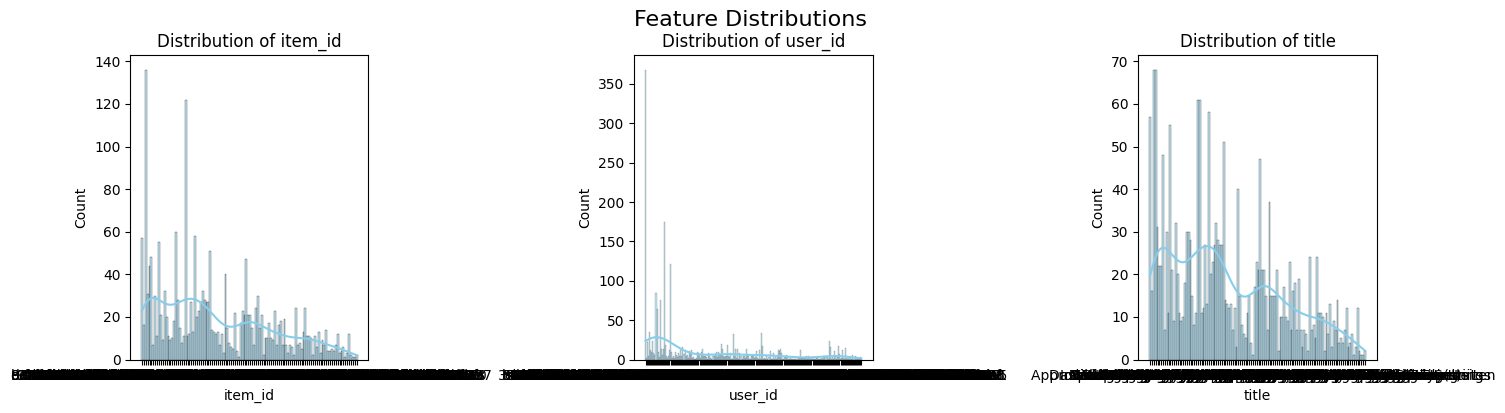

In [0]:
display(plot_feature_distributions(X))
